In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (20,20)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 70 # 200 e.g. is really fine, but slower%matplotlib inline

In [3]:
import sys
import os
import numpy as np
sys.path.append('../../../ASTRA_COMPARISONRunner-HMCC/')
sys.path.append('../../')

In [4]:
from Support.OMDirectory import load_directory, get_runs, save_summary_files

In [5]:
runs = get_runs(database='../../../ASTRA_COMPARISONRunner-HMCC/TestingGaussian.db')
runs

['4ef7e089-284c-4756-b7c5-86c3df016c28',
 '1cffbc50-bf7b-4c79-bb48-7a7e6c019638']

In [6]:
omdir=load_directory(id=runs[-1], database='../../../ASTRA_COMPARISONRunner-HMCC/TestingGaussian.db')

In [7]:
# Create summary files (which might not exist!)
omdir.save_summary_files()

In [10]:
omdir.twiss

['z', 't', 'kinetic_energy', 'gamma', 'cp', 'cp_eV', 'p', 'enx', 'ex', 'eny', 'ey', 'enz', 'ez', 'beta_x', 'gamma_x', 'alpha_x', 'beta_y', 'gamma_y', 'alpha_y', 'beta_z', 'gamma_z', 'alpha_z', 'sigma_x', 'sigma_y', 'sigma_z', 'sigma_t', 'sigma_p', 'sigma_cp', 'sigma_cp_eV', 'mux', 'muy', 'eta_x', 'eta_xp', 'element_name', 'ecnx', 'ecny', 'eta_x_beam', 'eta_xp_beam', 'eta_y_beam', 'eta_yp_beam', 'beta_x_beam', 'beta_y_beam', 'alpha_x_beam', 'alpha_y_beam']

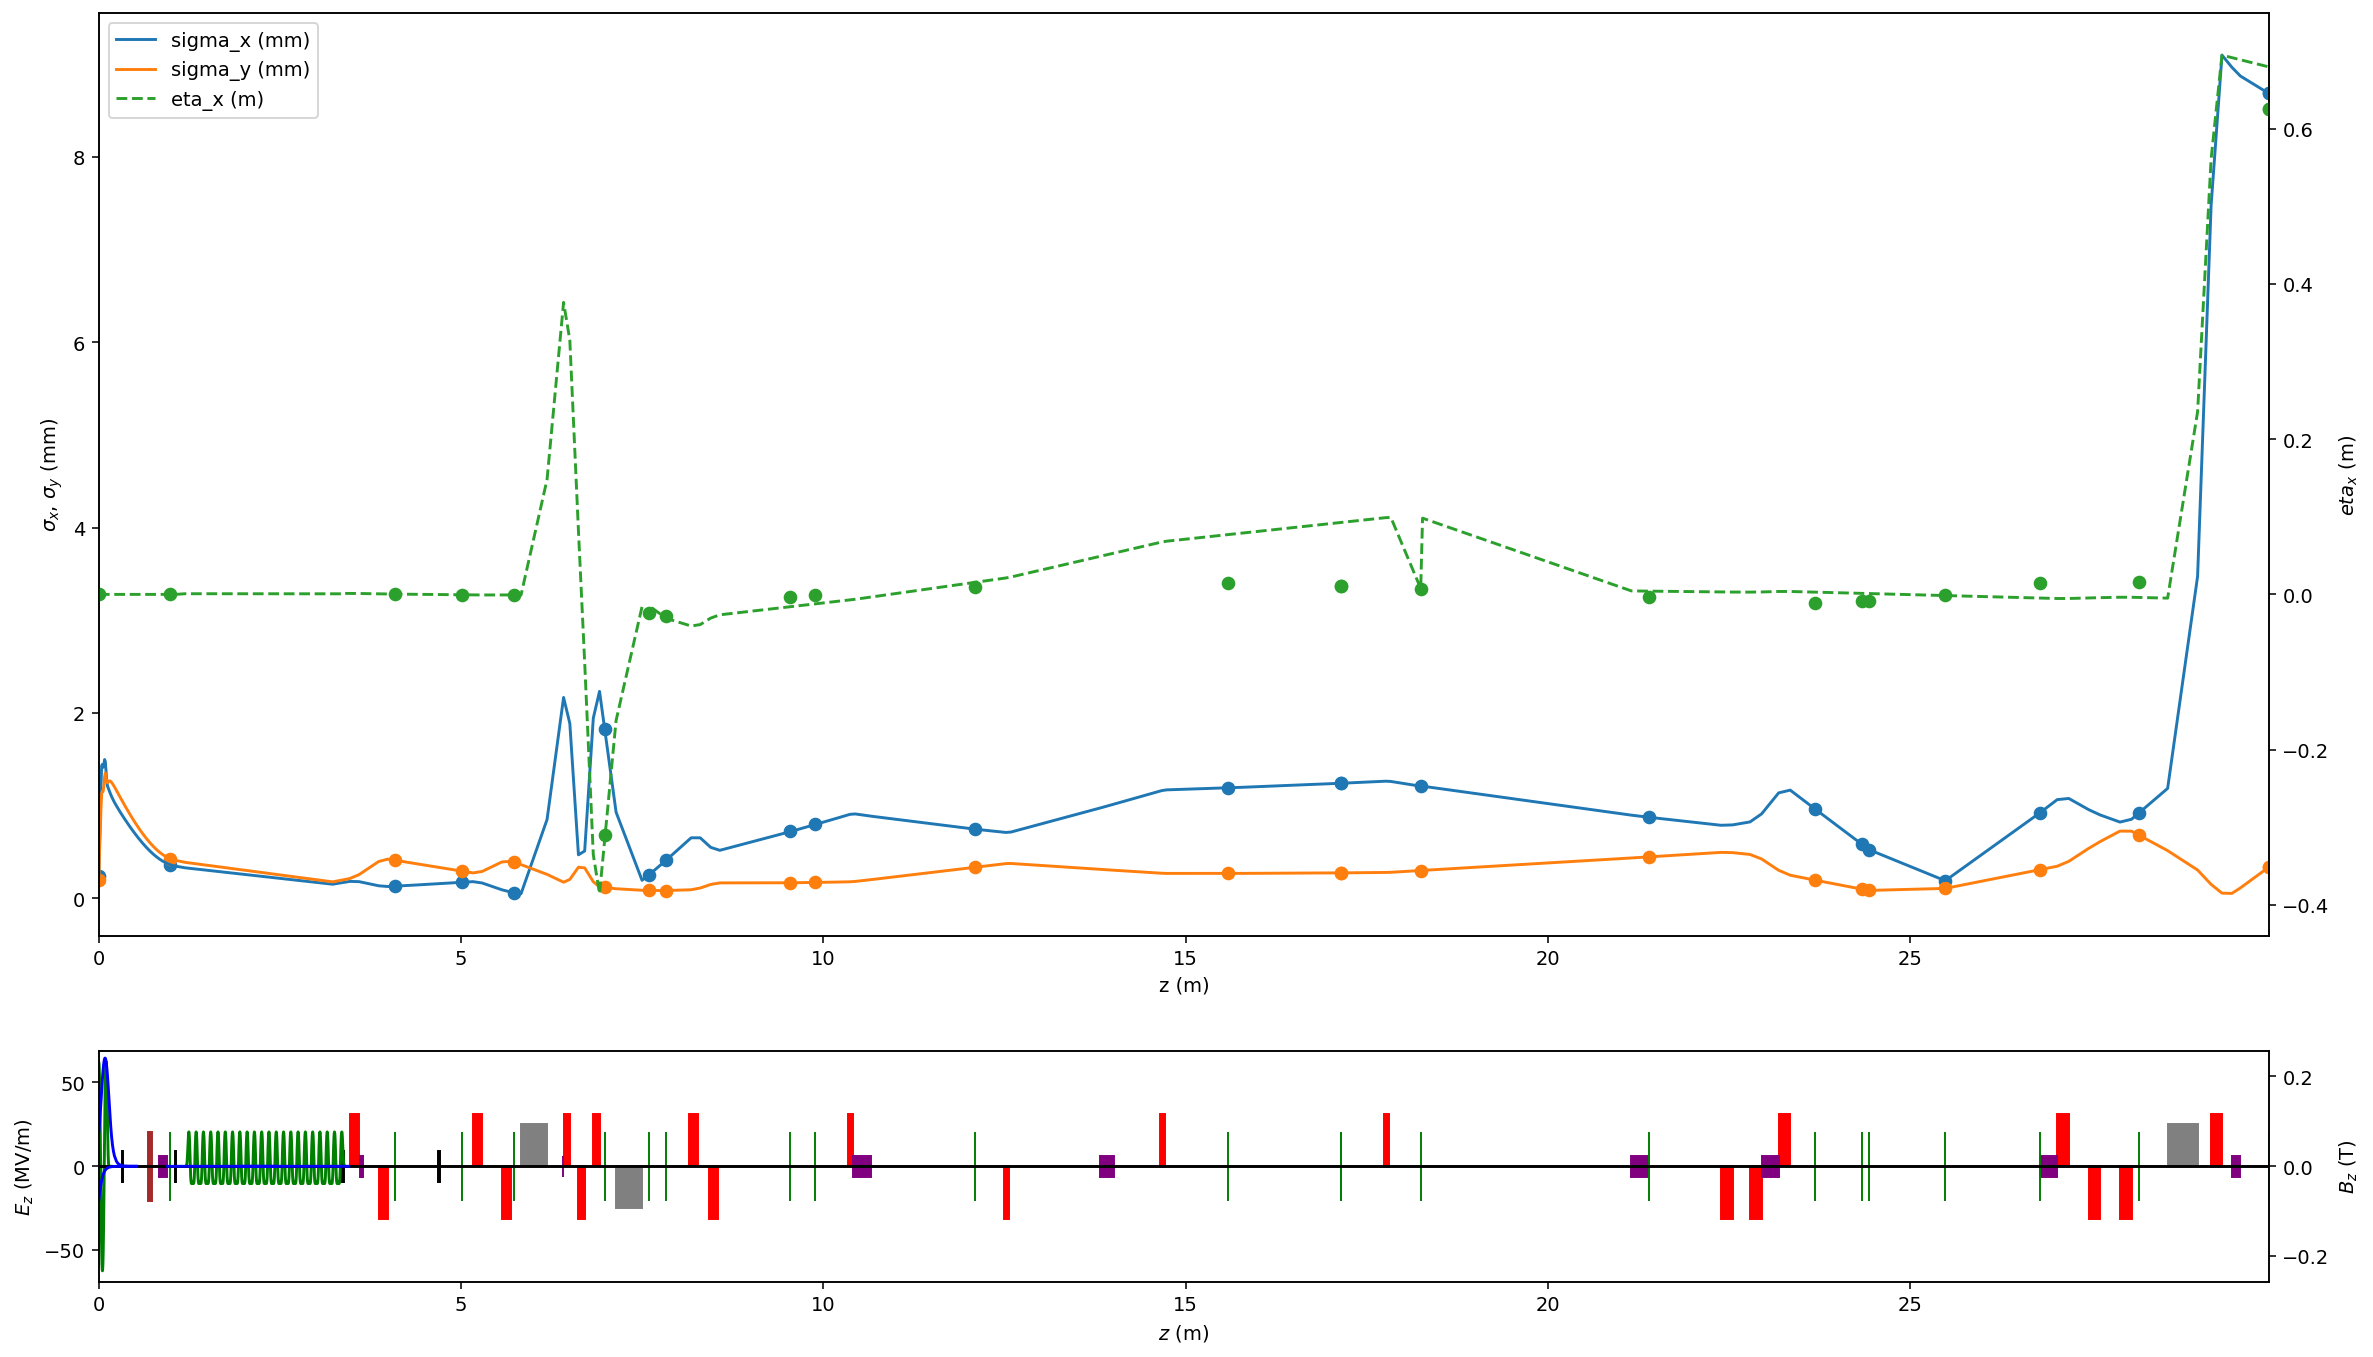

In [11]:
omdir.plot(include_particles=True, include_layout=True, limits=[0,30], ykeys=['sigma_x', 'sigma_y'],ykeys2=['eta_x'])

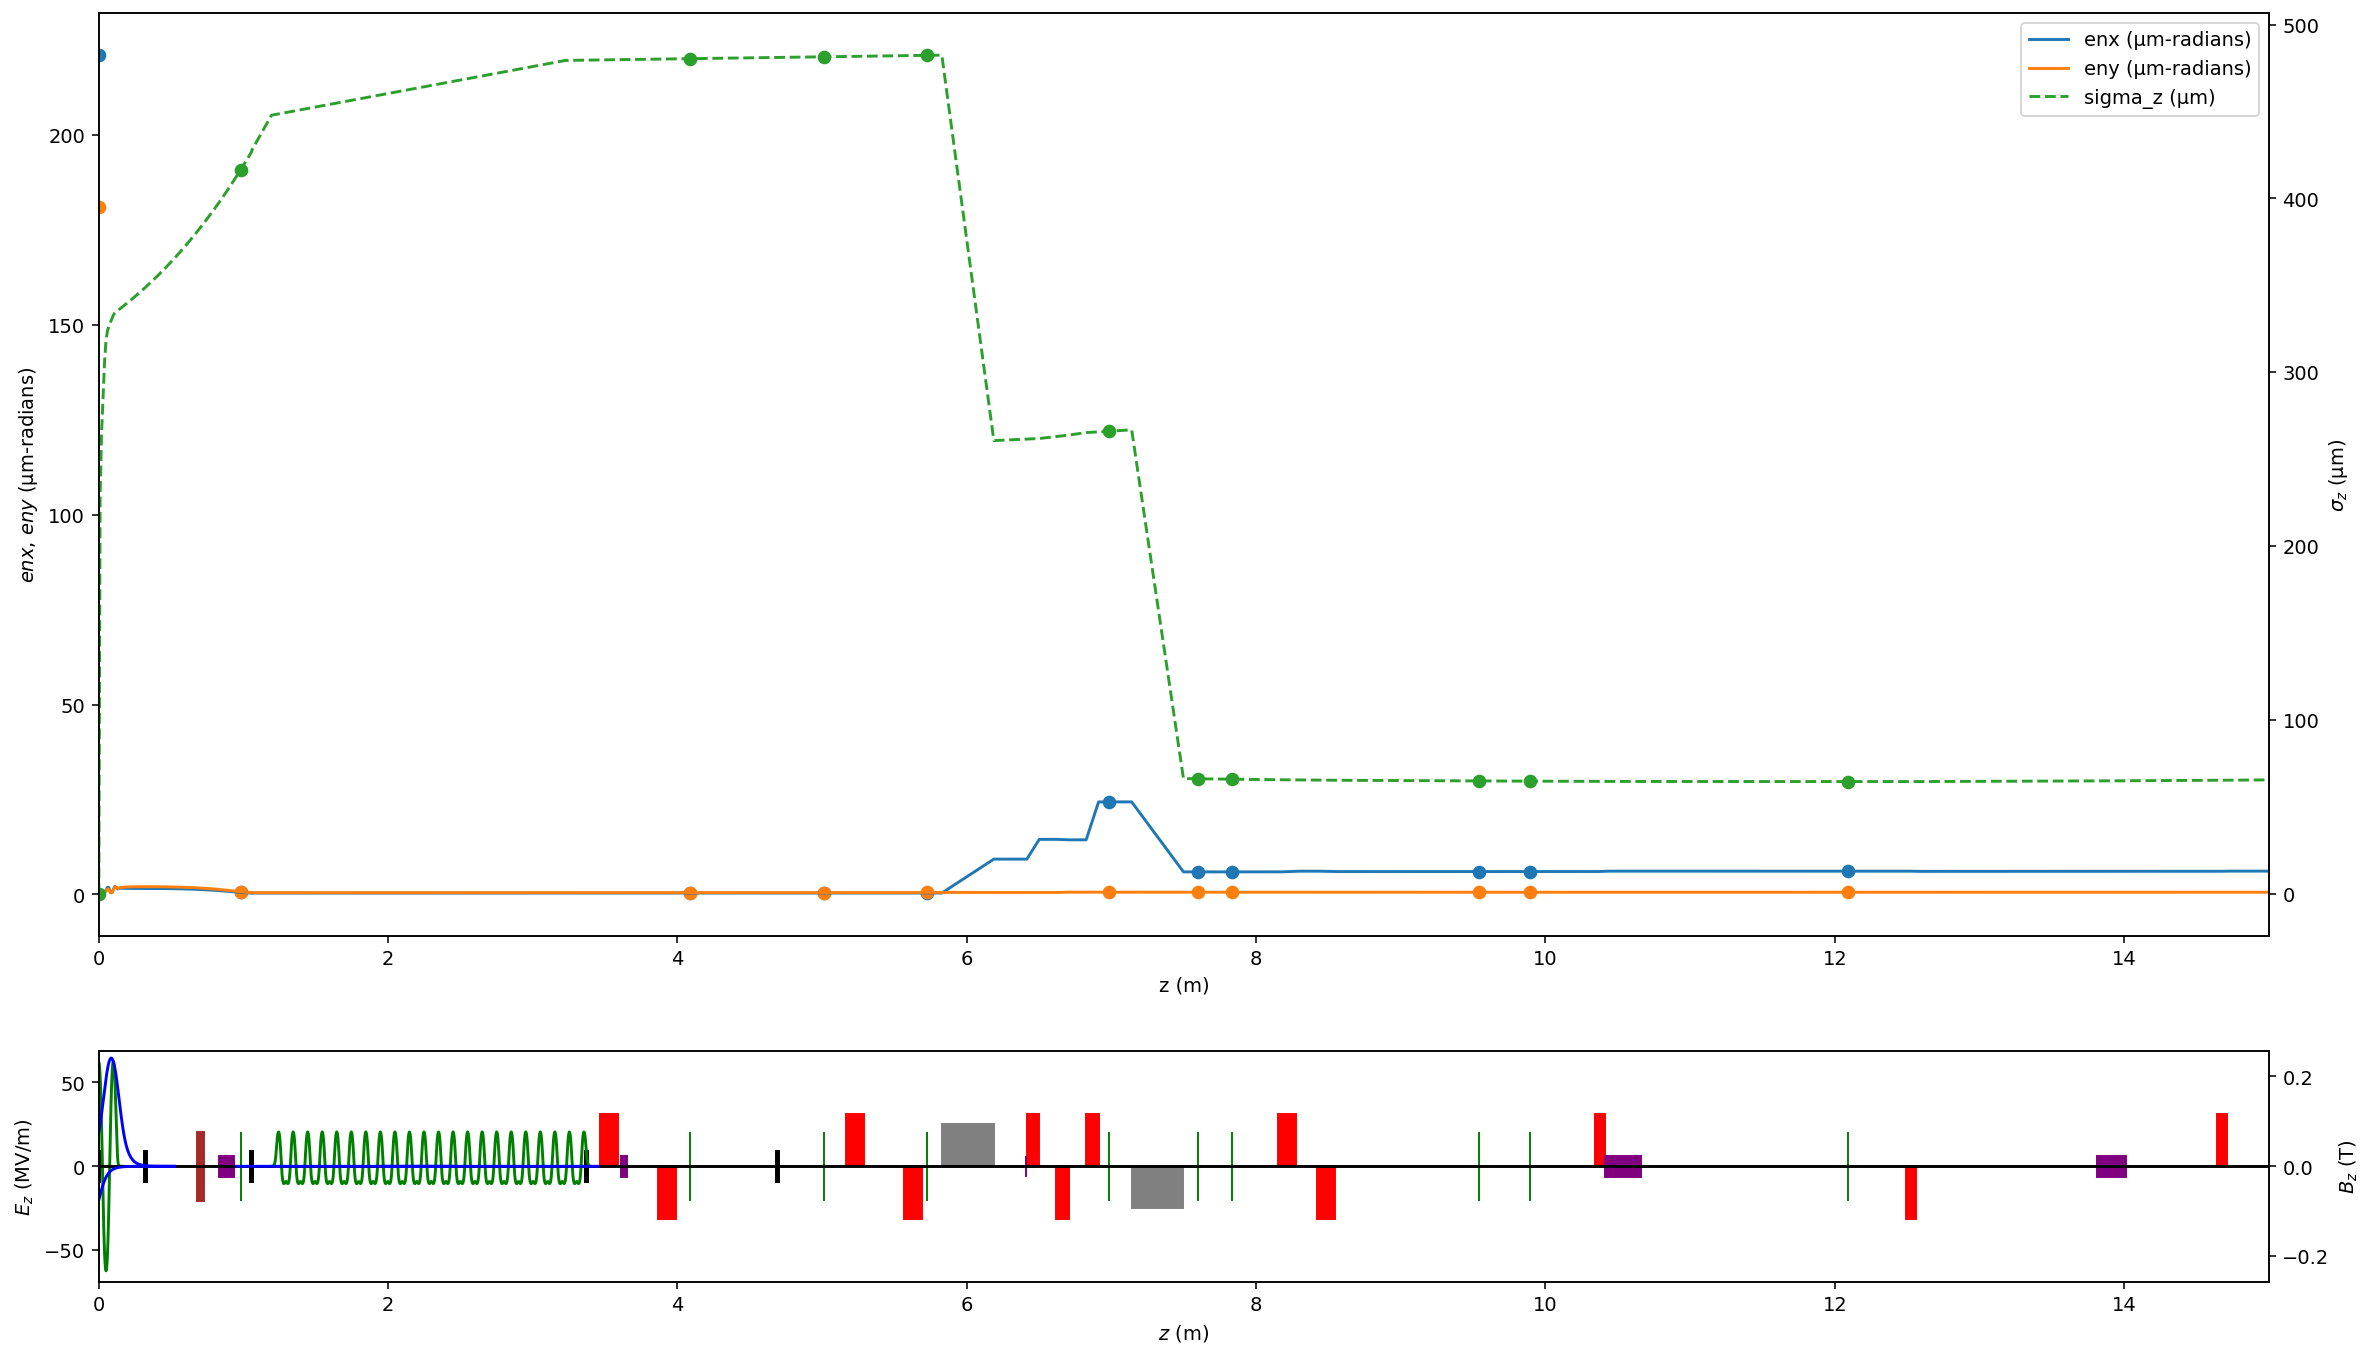

In [12]:
omdir.plot(include_particles=True, include_layout=True, xkey='z', ykeys=['enx', 'eny'],ykeys2=['sigma_z'], limits=[0,15])

In [13]:
omdir.element('CLA-S02-MAG-QUAD-01')

{'buffer_start': [0, 0, 3.44808],
 'csr_bins': 200,
 'csr_enable': True,
 'current_bins': 0,
 'field_integral_coefficients': [-2.23133410405682e-10,
                                 4.5196171252132e-08,
                                 -3.46208258004659e-06,
                                 0.000111195870210961,
                                 0.0238129337415767,
                                 0.00981229429460256],
 'global_rotation': [0, 0, 0],
 'isr_enable': True,
 'k1l': 1.59,
 'length': 0.12868478212775,
 'longitudinal_wakefield_enable': True,
 'lsc_bins': 200,
 'lsc_enable': True,
 'position_end': [0.0, 0, 3.59149],
 'position_errors': [0, 0, 0],
 'position_start': [0.0, 0, 3.46281],
 'rotation_errors': [0, 0, 0],
 'sr_enable': True,
 'strength_errors': [0],
 'transverse_wakefield_enable': True,
 'type': 'quadrupole'}


In [14]:
omdir.element('CLA-L01-CAV','phase')

-3.0

In [15]:
np.std(np.abs(omdir.beams.Q))

7.622768796687562e-17

In [16]:
omdir.twiss.interpolate(5, 'sigma_x')

0.0001737219080216994

# OMDIR with GPT Laser

In [17]:
omdirGPT=load_directory(id='4ef7e089-284c-4756-b7c5-86c3df016c28', database='../../../ASTRA_COMPARISONRunner-HMCC/TestingGaussian.db')

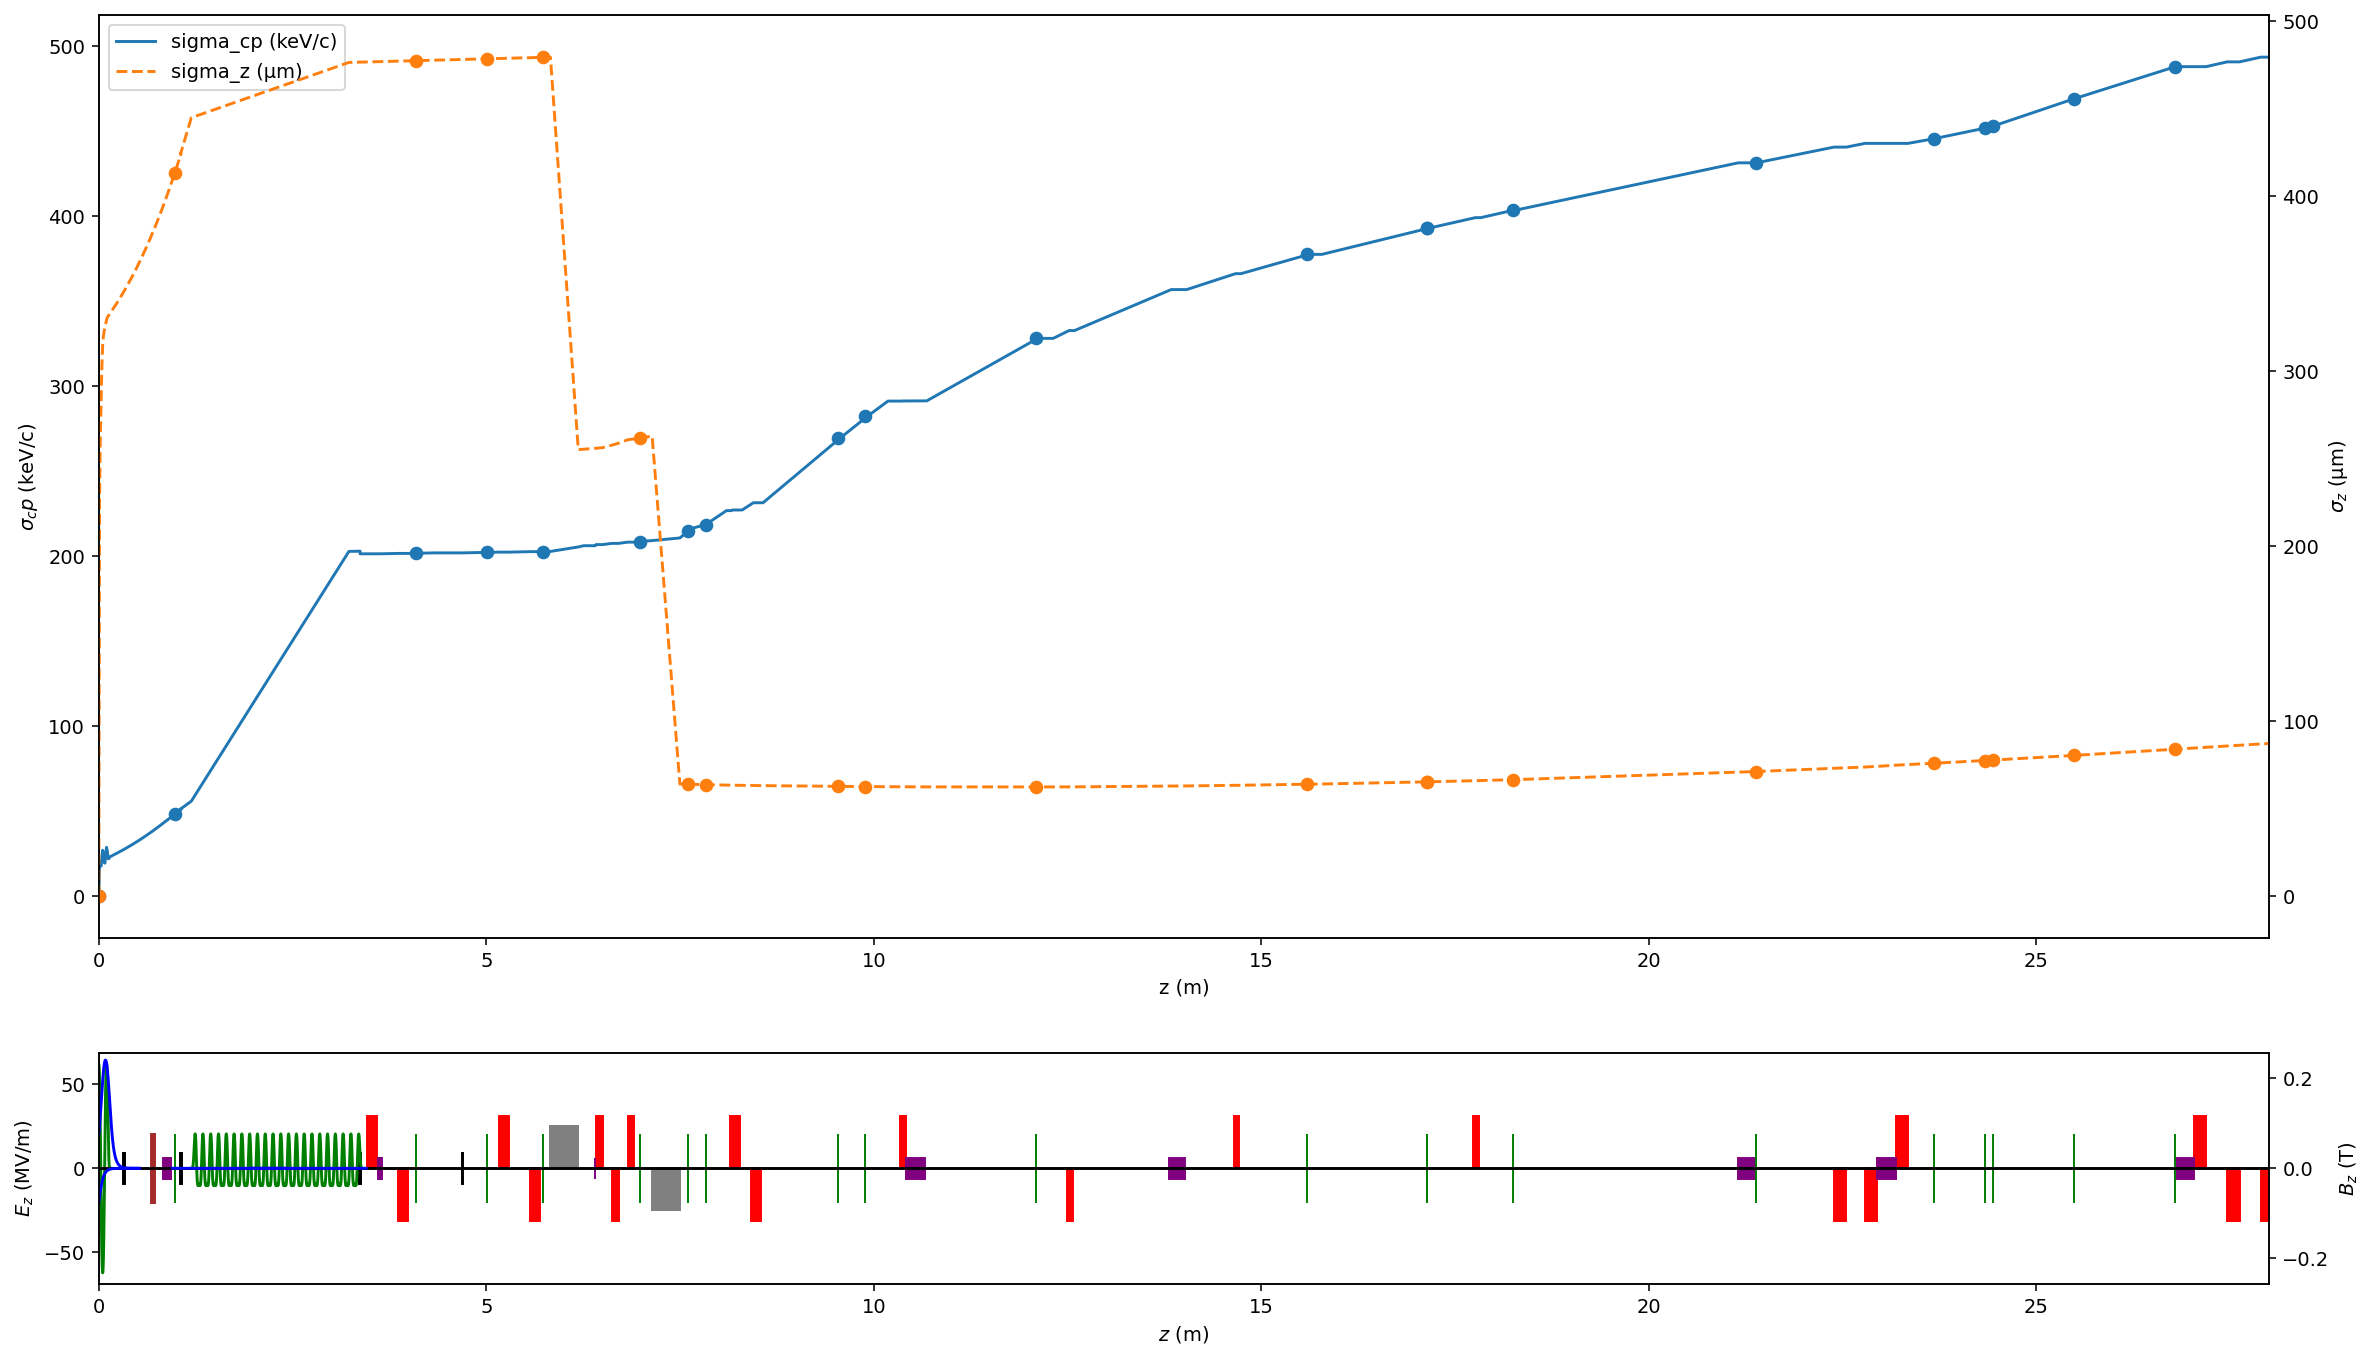

In [18]:
omdirGPT.plot(include_particles=True, include_layout=True, xkey='z', ykeys=['sigma_cp'],ykeys2=['sigma_z'], limits=[0,28])

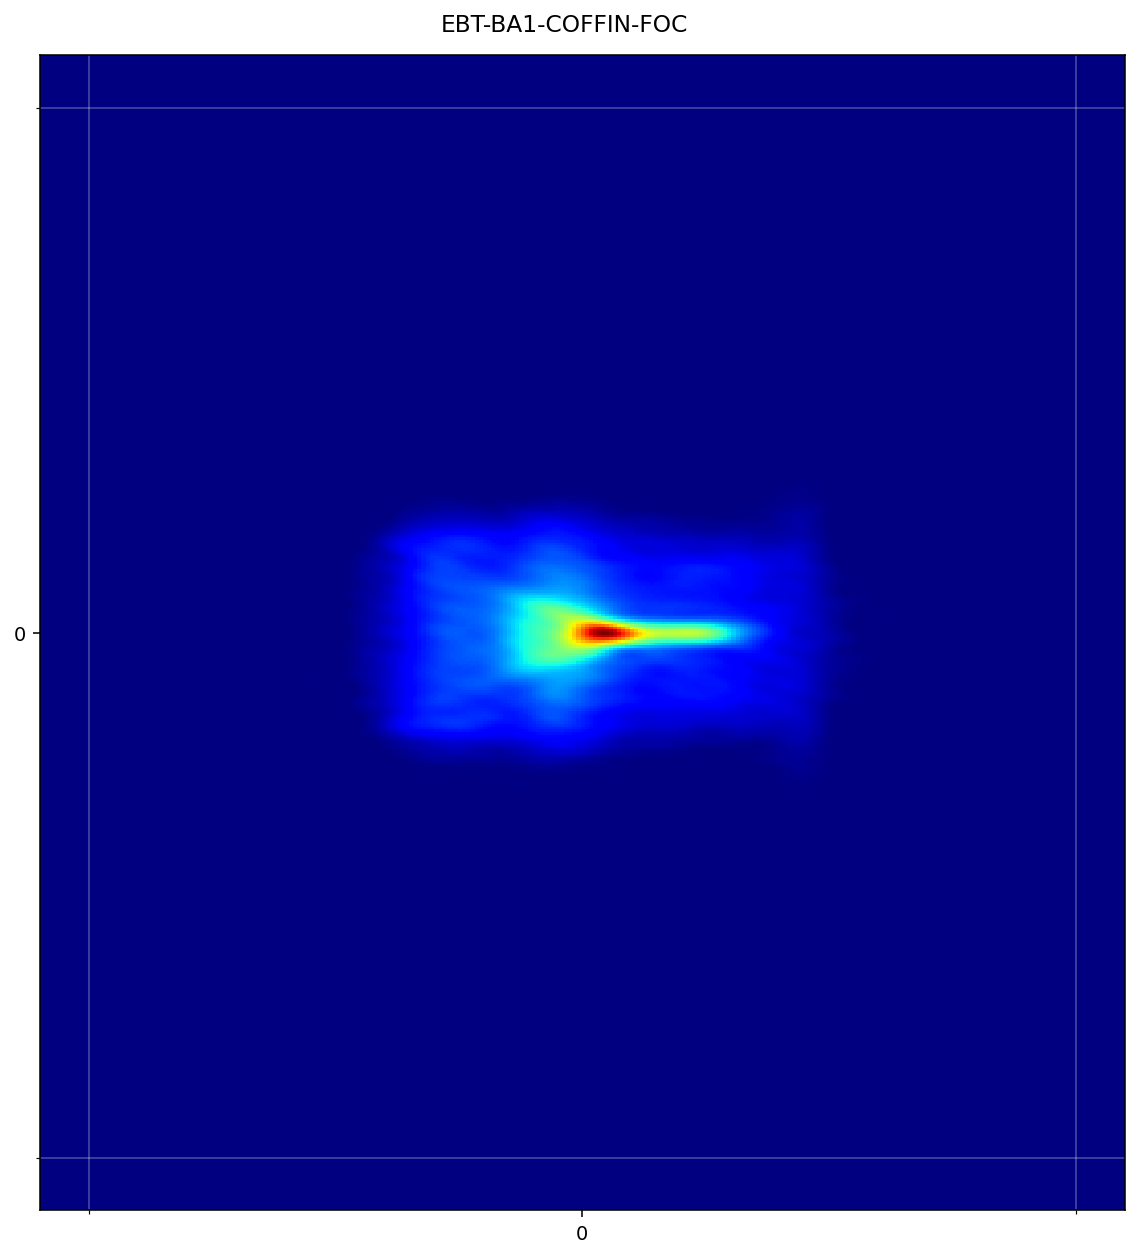

In [19]:
omdirGPT.getScreen('EBT-BA1-COFFIN-FOC').plotScreenImage(size=15, colormap=plt.cm.jet, marginals=False,
                                                      limits=1.1, numPointsPerSigma=20, screen=True)

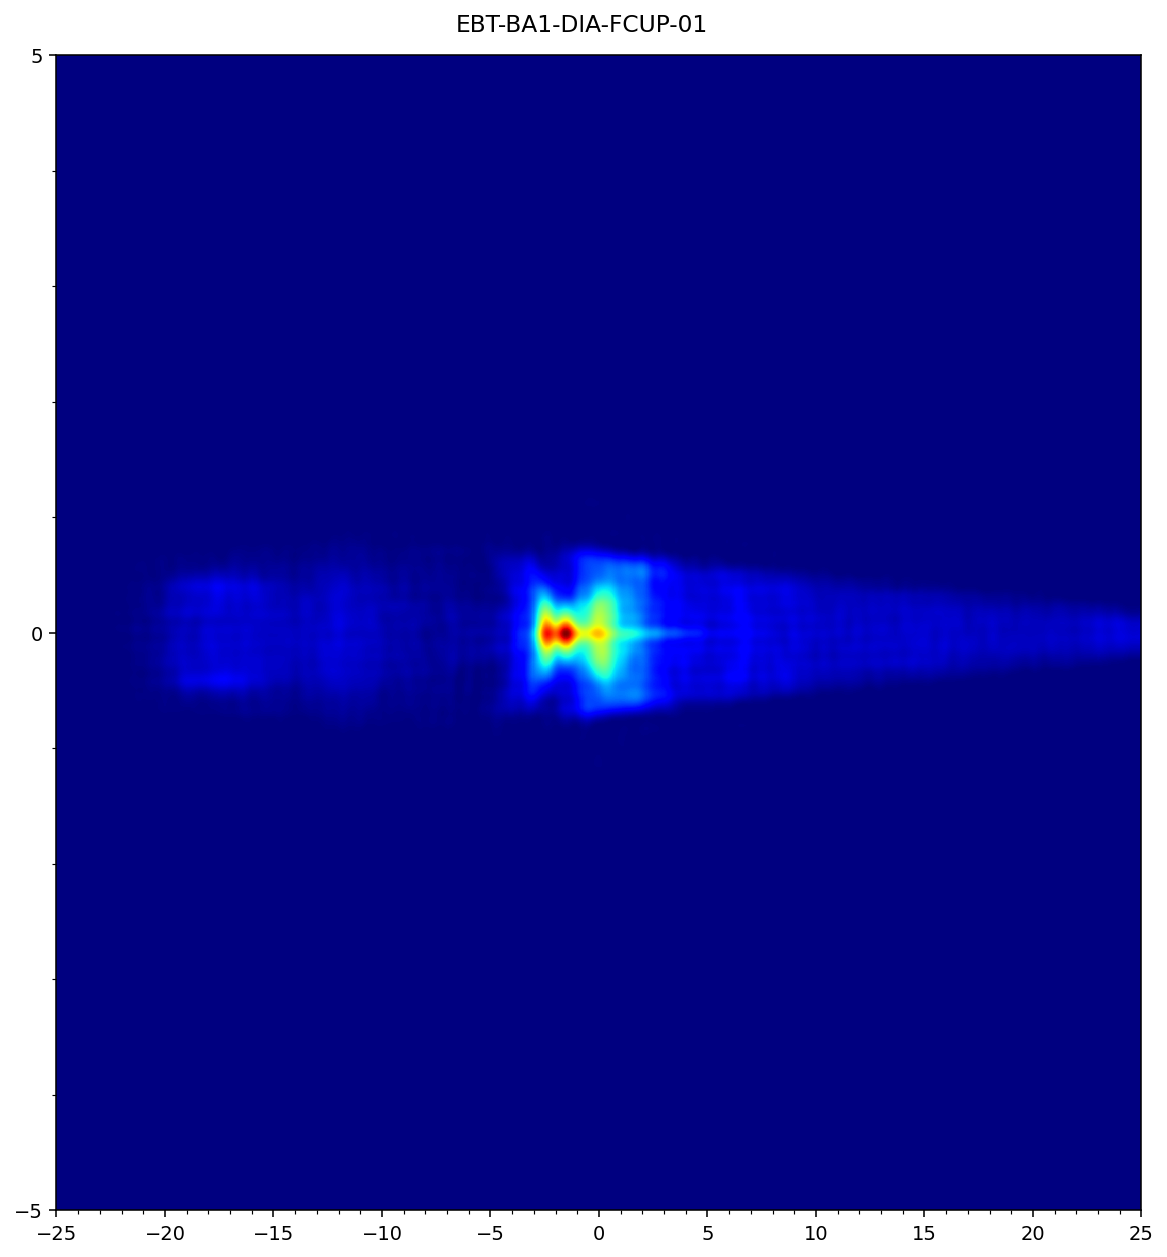

In [20]:
omdirGPT.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=30, marginals=False, grid=False, 
                                                       screen=True, numPointsPerSigma=100, limits=[[-25,25],[-5,5]])

# OMDIR with VC

In [21]:
omdirVC=load_directory(id='1cffbc50-bf7b-4c79-bb48-7a7e6c019638', database='../../../ASTRA_COMPARISONRunner-HMCC/TestingGaussian.db')

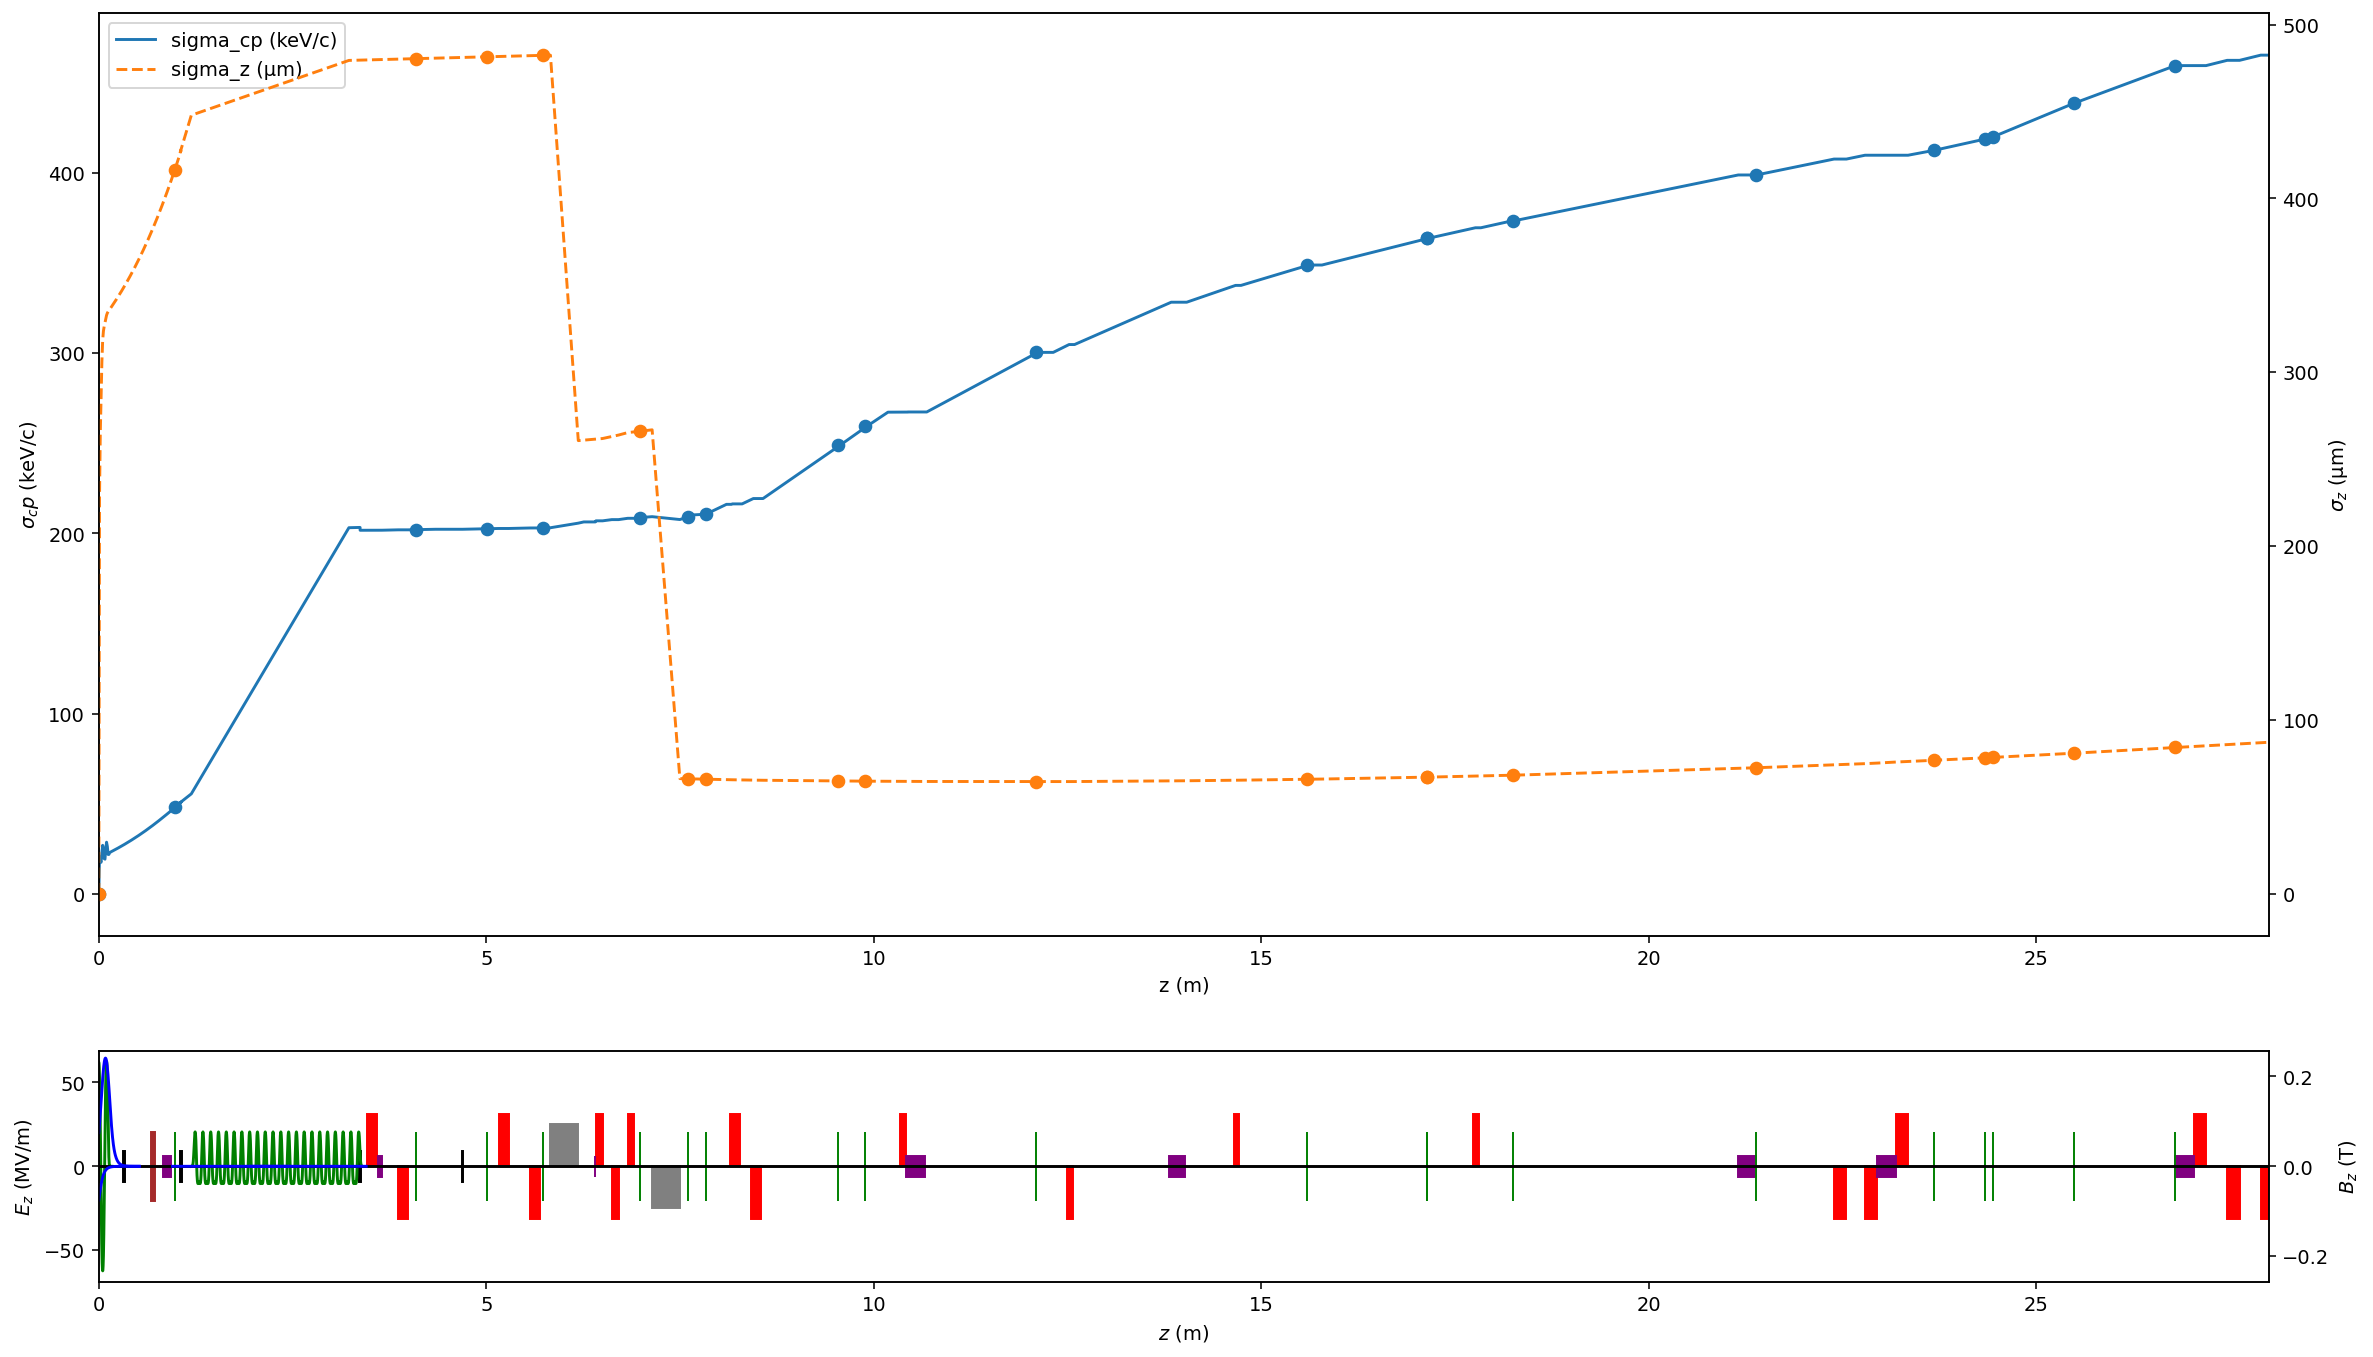

In [22]:
omdirVC.plot(include_particles=True, include_layout=True, xkey='z', ykeys=['sigma_cp'],ykeys2=['sigma_z'], limits=[0,28])

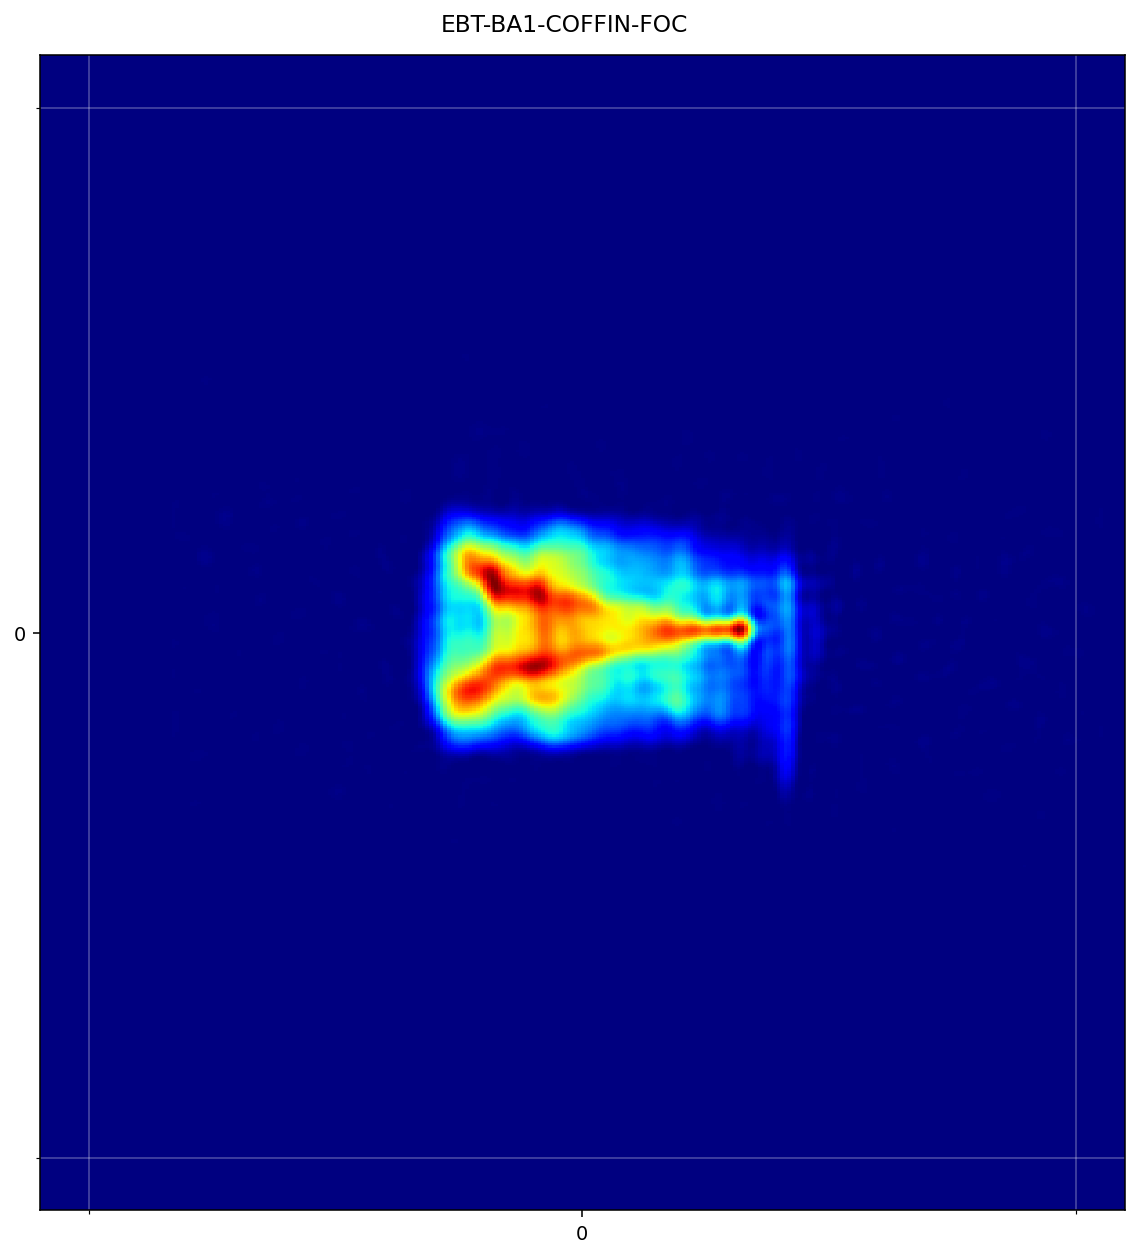

In [23]:
omdirVC.getScreen('EBT-BA1-COFFIN-FOC').plotScreenImage(size=15, colormap=plt.cm.jet, marginals=False,
                                                      limits=1.1, numPointsPerSigma=20, screen=True)

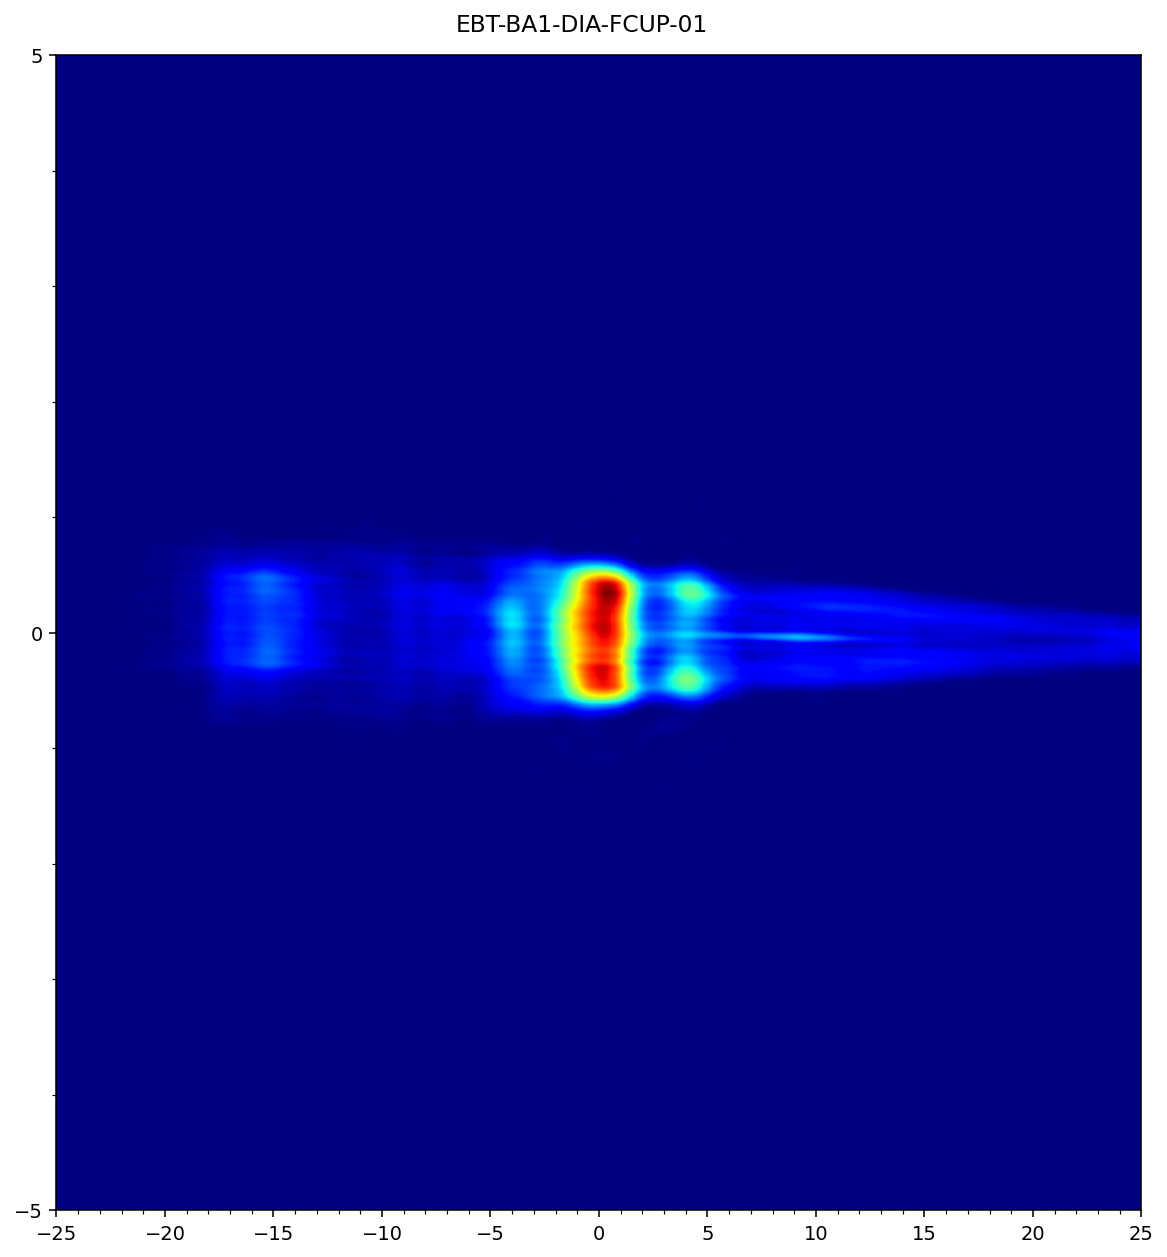

In [24]:
omdirVC.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=30, marginals=False, grid=False, 
                                                       screen=True, numPointsPerSigma=100, limits=[[-25,25],[-5,5]])

# Screen Images

In [ ]:
omdir.screens

In [ ]:
omdir.getScreen('CLA-S02-DIA-SCR-02').plotScreenImage(size=15, colormap=plt.cm.jet, marginals=False,
                                                      limits=1.1, numPointsPerSigma=20, screen=True)

In [ ]:
plt.scatter(1e3*omdir.getScreen('CLA-S02-DIA-SCR-02').x, 1e3*omdir.getScreen('CLA-S02-DIA-SCR-02').y)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

In [ ]:
# See https://bitbucket.org/lbl-cascade/fastkde/src/master/fastkde/fastKDE.py for options to pass to fastKDE
omdir.getScreen('EBT-BA1-COFFIN-FOC').plotScreenImage(size=15, colormap=plt.cm.jet, marginals=False,
                                                      limits=1.1, numPointsPerSigma=20, screen=True)

In [ ]:
omdir.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=30, marginals=False, grid=False, 
                                                       screen=True, numPointsPerSigma=100, limits=[[-25,25],[-5,5]])

In [ ]:
omdir.getScreen('EBT-BA1-DIA-FCUP-01').plotScreenImage(scale=1, colormap=plt.cm.jet, size=None, marginals=True, screen=True)